In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("Customers.csv")
print("Data imported")

Data imported


In [5]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
X = dataset.iloc[:,[3,4]].values 
#to simplify, taking these 2 as independent variables
#X.head() # a df if .values is not used
X #now an array

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

No handles with labels found to put in legend.


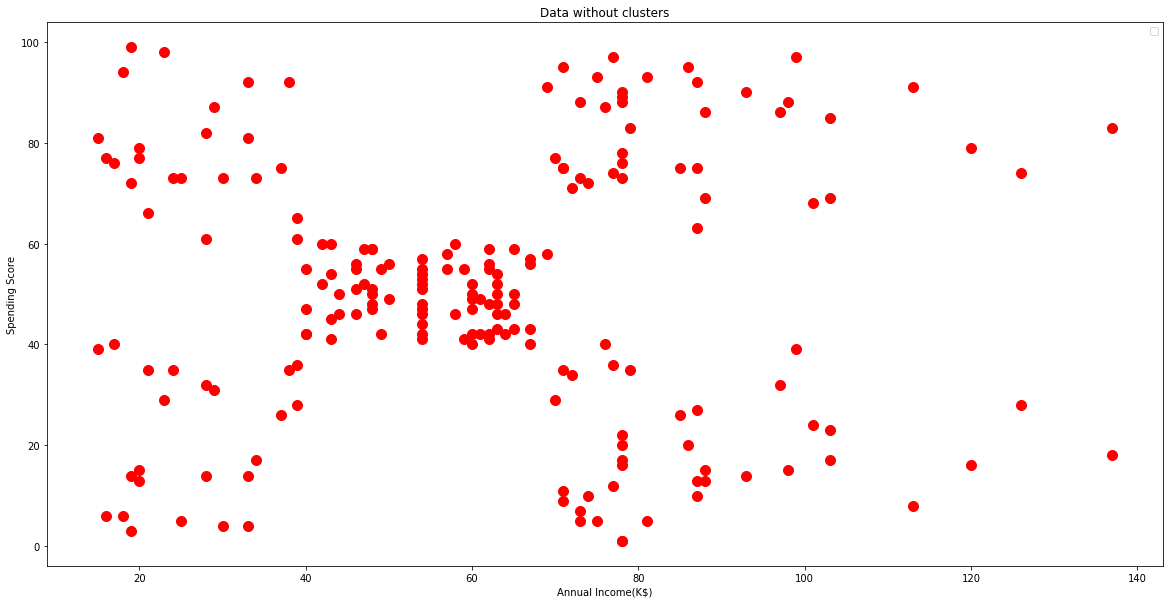

In [37]:
#Date before clustering
plt.figure(figsize = (20,10))
plt.scatter(dataset.iloc[:,3].values, dataset.iloc[:,4].values, s =100, c = 'r')
plt.title("Data without clusters")
plt.xlabel("Annual Income(K$)")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

In [12]:
from sklearn.cluster import KMeans

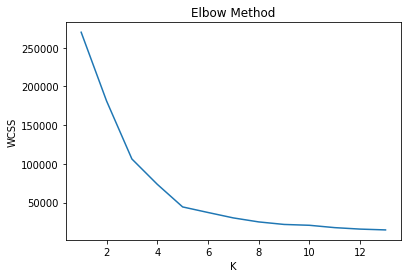

In [25]:
#Using Elbow Method to find K
import math
wcss = [] #Within Cluster Sum of Squares
N = int(math.sqrt(len(X))) #math.sqrt(no. of features)

for i in range(1,N):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0) #k-means++ algo which is used for Kmeans
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) #inertia_ calculates wcss
    
    
plt.plot(range(1,N),wcss)
plt.title("Elbow Method")
plt.xlabel("K")
plt.ylabel("WCSS")
plt.show()

#Gives K = 5

In [30]:
#Fitting K-Means to the dataset
kmeans = KMeans(n_clusters= 5, init = 'k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(X) #Gives clusters
#y_kmeans = kmeans.fit_transform(X) #gives clustering and transform X to cluster-distance space
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

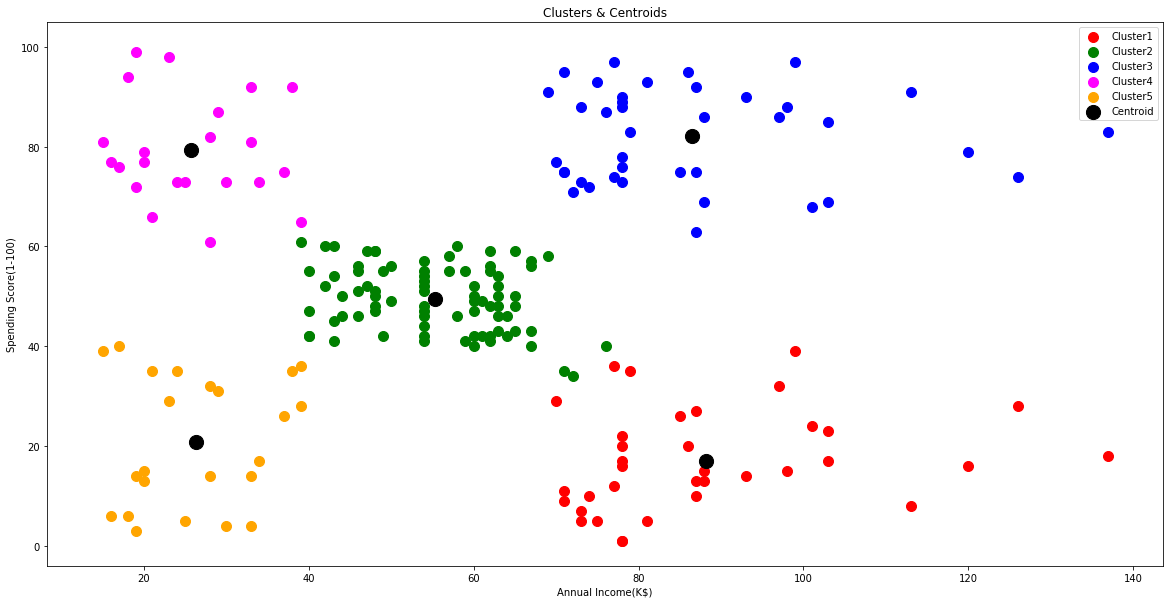

In [34]:
#Visualise the results
plt.figure(figsize=(20,10))
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s =100, c= 'red', label= 'Cluster1')
            #cluster from feature 1 #cluster from feature 2 #pixel size
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s =100, c= 'green', label= 'Cluster2')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s =100, c= 'blue', label= 'Cluster3')
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3,1], s =100, c= 'magenta', label= 'Cluster4')
plt.scatter(X[y_kmeans == 4,0], X[y_kmeans == 4,1], s =100, c= 'orange', label= 'Cluster5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s =200, c = 'black', label = 'Centroid' )
plt.title('Clusters & Centroids')
plt.xlabel("Annual Income(K$)")
plt.ylabel("Spending Score(1-100)")
plt.legend()
plt.show()